In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from numpy import set_printoptions
np.set_printoptions(suppress=True)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import (confusion_matrix, log_loss, precision_score, recall_score,f1_score, precision_recall_curve,
classification_report, roc_curve)
from sklearn.preprocessing import StandardScaler


Attribute information:
For more information, read [Moro et al., 2011].

   Input variables:
   #### bank client data:
   1 - age (numeric)
   
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   #### related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   #### other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [2]:
df=pd.read_csv('bank/bank-full.csv',sep=';')
df.drop('duration', axis=1, inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [4]:
# plt.figure(dpi=200)
# sns.pairplot(df, hue='y')

(array([84., 87., 87., 87., 80., 56., 32., 15., 17., 14.]),
 array([ -1. ,  86.2, 173.4, 260.6, 347.8, 435. , 522.2, 609.4, 696.6,
        783.8, 871. ]),
 <BarContainer object of 10 artists>)

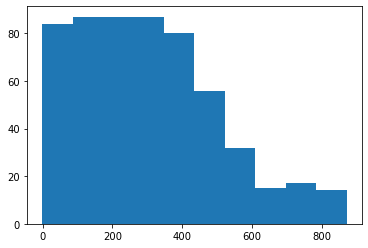

In [5]:
plt.hist(df['pdays'].unique())

In [6]:
df['pdays']

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45211, dtype: int64

In [7]:
df['pdays']=df['pdays'].astype(str).str.replace('-1','999').astype(int)

In [8]:
df['pdays']

0        999
1        999
2        999
3        999
4        999
        ... 
45206    999
45207    999
45208    184
45209    999
45210    188
Name: pdays, Length: 45211, dtype: int64

In [9]:
df['job']=df['job'].str.replace('-','_')
df['job']=df['job'].str.replace('.','')

/var/folders/4q/s5vk58v95472hjx15zb8y_940000gn/T/ipykernel_34128/635156676.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['job']=df['job'].str.replace('.','')


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [11]:
df.to_csv('bank_cleaned.csv',index=False)

In [12]:
df.groupby(['previous'])['pdays'].mean()

previous
0      999.000000
1      235.063131
2      230.446344
3      214.515762
4      217.418768
5      205.664488
6      201.440433
7      201.224390
8      193.395349
9      219.923913
10     201.134328
11     227.923077
12     224.295455
13     213.552632
14     174.315789
15     224.950000
16     220.615385
17     247.466667
18     242.000000
19     232.090909
20     205.375000
21     176.500000
22     303.333333
23     273.125000
24     241.400000
25     250.000000
26     111.000000
27     207.800000
28     295.500000
29     246.500000
30     234.000000
32     349.000000
35      46.000000
37     103.500000
38     254.500000
40     270.000000
41     778.000000
51     256.000000
55     776.000000
58     353.000000
275    262.000000
Name: pdays, dtype: float64

In [13]:
df['campaign'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: campaign, dtype: int64

In [14]:
df.groupby(['y'])['campaign'].mean()

y
no     2.846350
yes    2.141047
Name: campaign, dtype: float64

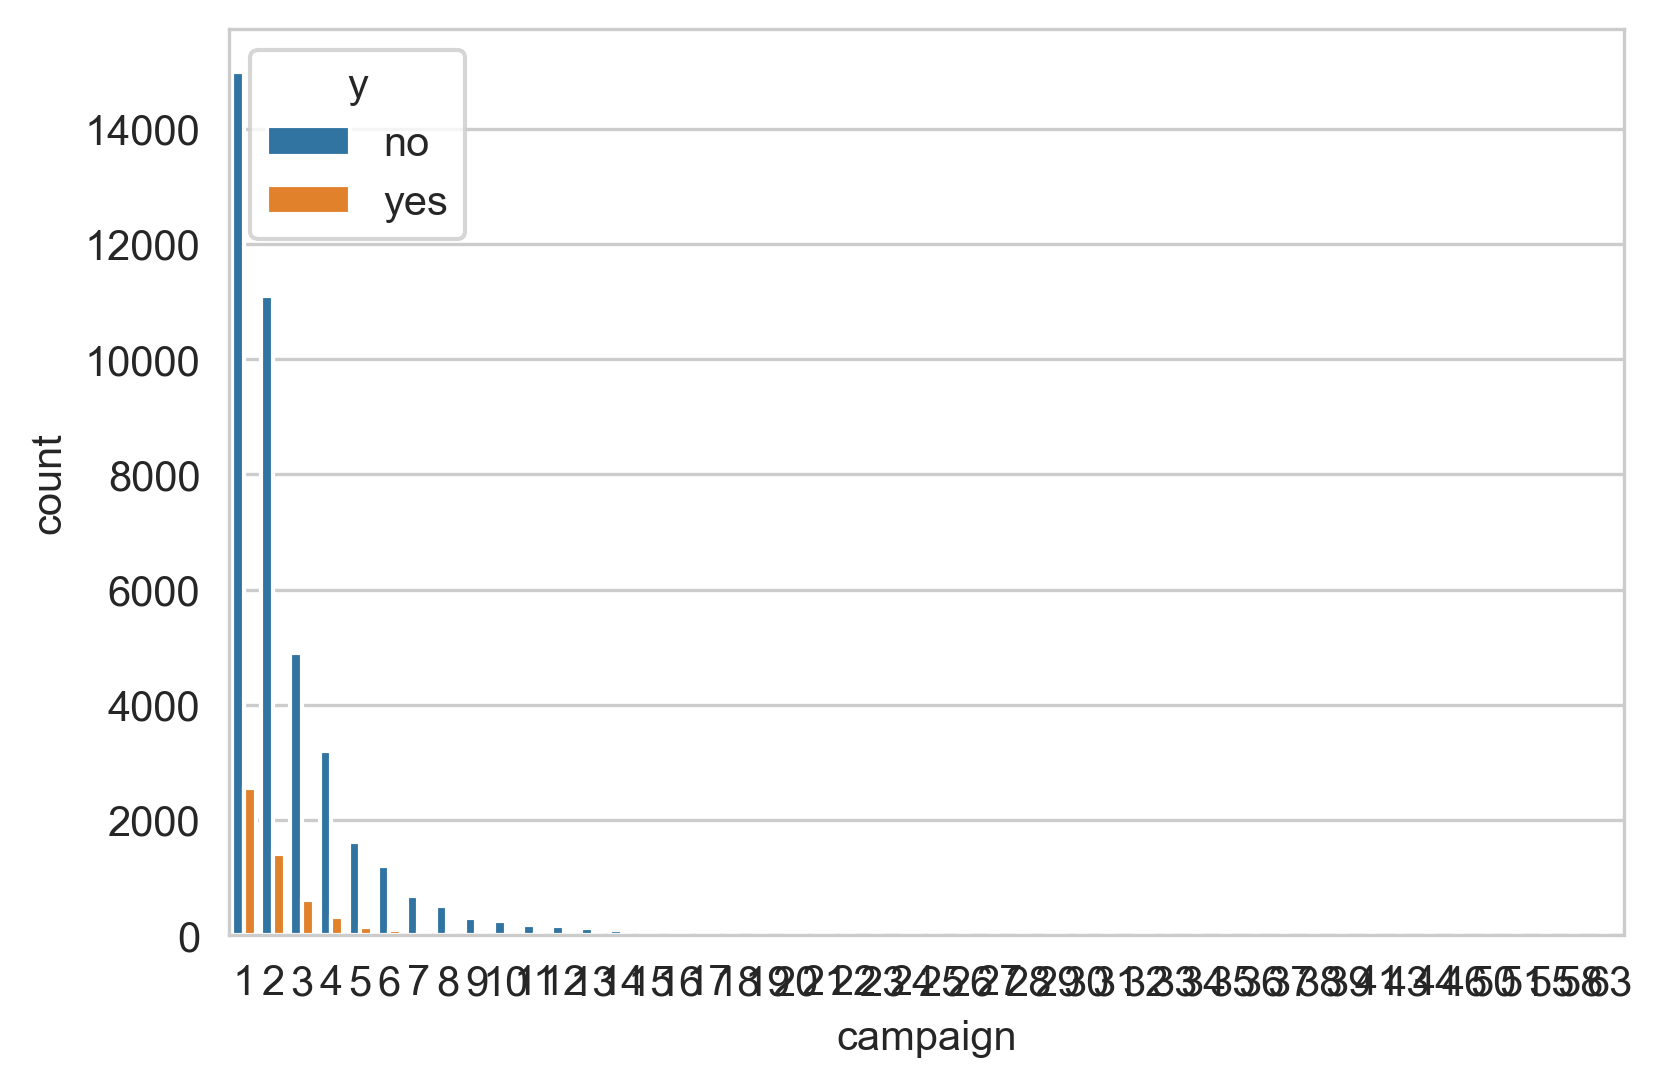

In [15]:
plt.figure(dpi=300)
sns.set_style('whitegrid')
sns.countplot(x='campaign',hue='y',data=df);

In [16]:
X=df.drop(columns='y')
y=df['y']

In [17]:
X=pd.get_dummies(X)
X.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous', 'job_admin',
       'job_blue_collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self_employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=42)

In [19]:
plt.figure(dpi=150)
sns.pairplot(pd.concat([X_train, y_train], axis=1), hue='y')

KeyboardInterrupt: 

<Figure size 900x600 with 0 Axes>

Error in callback <function flush_figures at 0x7ff53b0a1ee0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
(df.month.unique())

In [ ]:
df

/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/Layla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

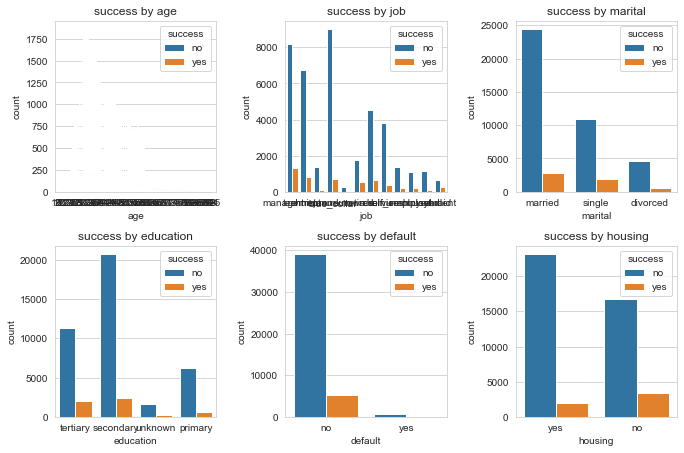

In [20]:
cols = ['age', 'job', 'marital', 'education', 'default', 'housing']
       

n_rows = 2
n_cols = 3

# The subplot grid and the figure size of each graph
# This returns a Figure (fig) and an Axes Object (axs)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c # index to go through the number of columns       
        ax = axs[r][c]  # Show where to position each subplot
        sns.countplot(df[cols[i]], hue=df["y"], ax=ax)
        ax.set_title(f'success by {cols[i]}' )
        ax.legend(title="success", loc='upper right') 
        
plt.tight_layout() 

In [21]:

sns.set_style('whitegrid')
sns.countplot(x='y',hue='balance',data=df);

ValueError: Image size of 1631x421991 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1800x1200 with 1 Axes>

<Figure size 1800x1200 with 0 Axes>

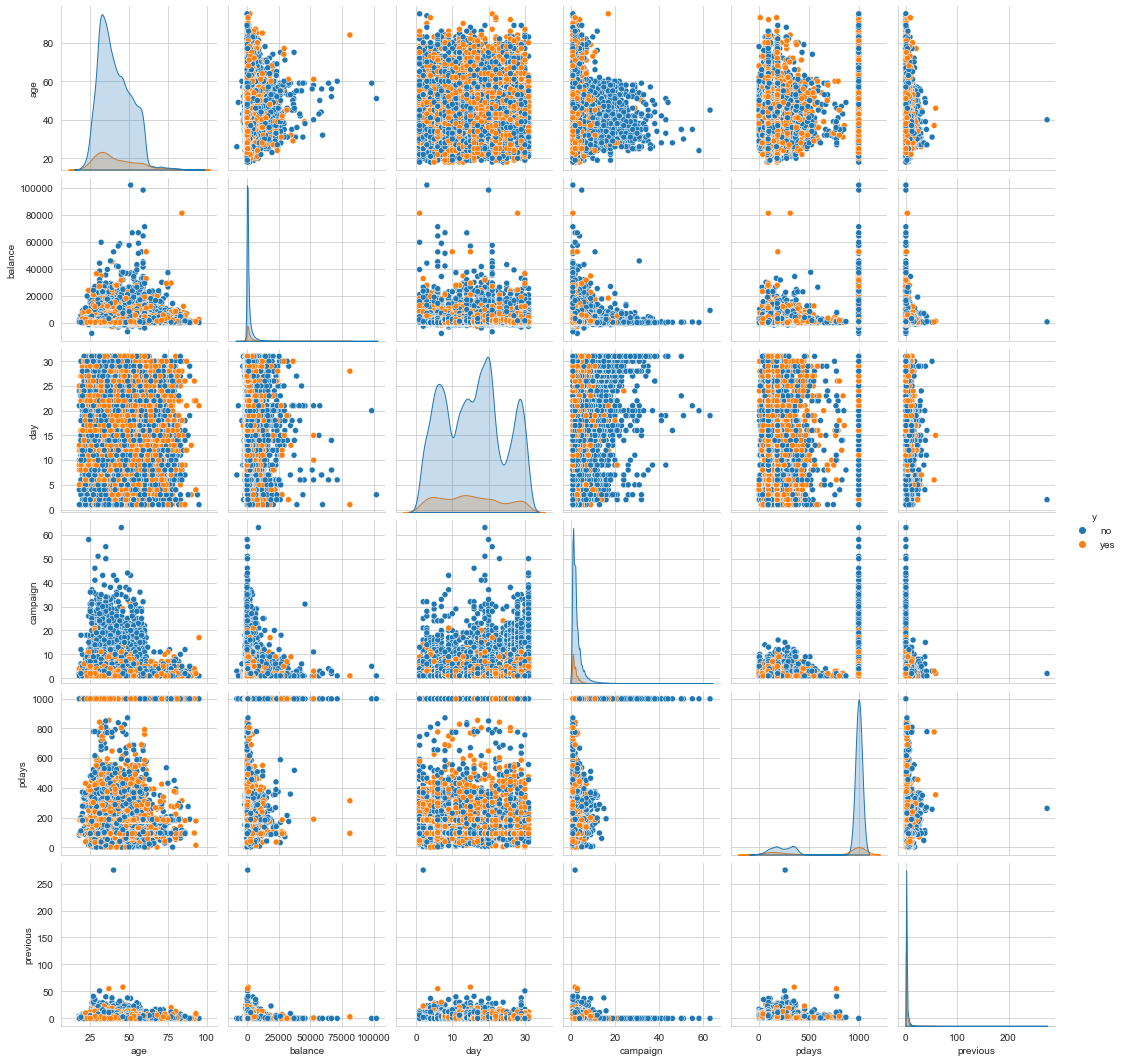

In [30]:
plt.figure(dpi=300)
sns.pairplot(df, hue='y')